In [10]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [11]:
IMAGE_SIZE= 256
BATCH_SIZE=32
CHANNELS= 3
EPOCHS= 50

In [39]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle= True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size= BATCH_SIZE
)

Found 5697 files belonging to 3 classes.


In [72]:
class_names = dataset.class_names
class_names

['Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___healthy']

In [40]:
len(dataset)

179

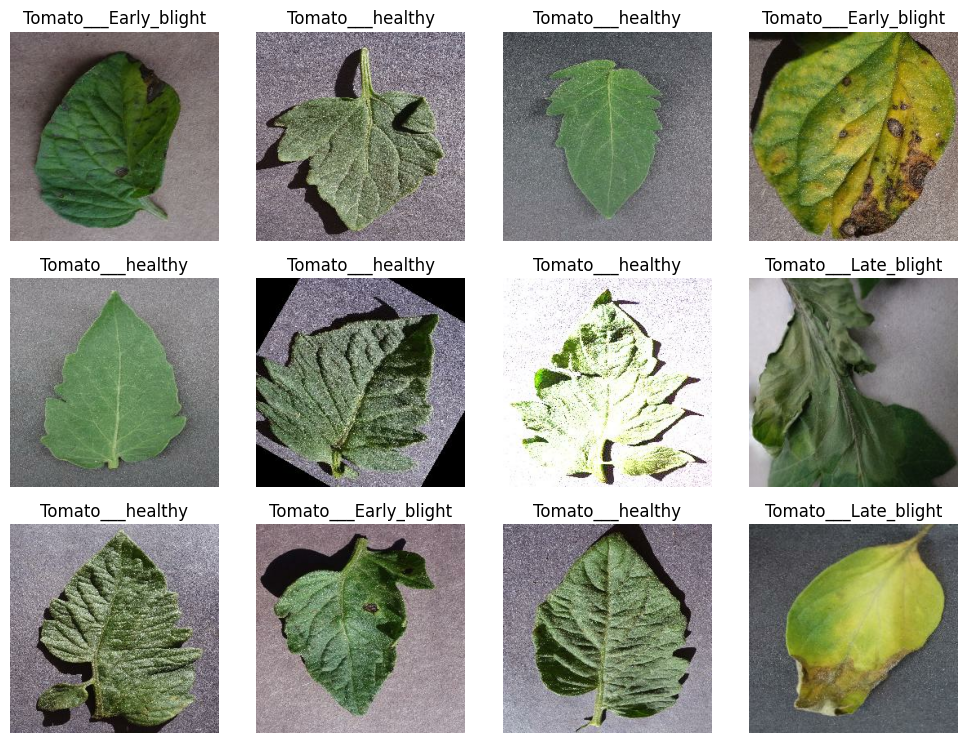

In [73]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        plt.subplot(4,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")
    plt.tight_layout()
    plt.show()

In [47]:
len(dataset)

179

In [27]:
80% ==> training
20% ==> 10% ==> validation, 10% ==> test

SyntaxError: invalid syntax (1019425809.py, line 1)

In [46]:
train_size = 0.8
len(dataset)*train_size

143.20000000000002

In [45]:
train_ds = dataset.take(143)
len(train_ds)


143

In [48]:
test_ds= dataset.skip(143)
len(test_ds)

36

In [34]:
val_size=0.6
len(dataset)*val_size

107.39999999999999

In [49]:
val_ds = test_ds.take(107)
len(val_ds)

36

In [40]:
val_ds= test_ds.skip(36)
len(test_ds)

36

In [12]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split= 0.1, test_split= 0.1, shuffle = True, shuffle_size = 10000):
    ds_size =len(ds)

    if(shuffle):
        ds= ds.shuffle(shuffle_size, seed=12)
        
    train_size =int (train_split * ds_size)
    val_size =int (val_split * ds_size)

    train_ds =ds.take(train_size)

    val_ds =ds.skip(train_size).take(val_size)
    test_ds =ds.skip(train_size).skip(val_size)

    
    return train_ds, val_ds, test_ds

In [50]:
train_ds, val_ds, test_ds =get_dataset_partitions_tf(dataset)

In [51]:
len(train_ds)

143

In [44]:
len(val_ds)

17

In [45]:
len(test_ds)

19

In [46]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [17]:
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.Rescaling(1.0 / 255),
])

In [14]:
data_augmentation= tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
])

In [19]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

In [20]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_2 (Sequential)            │ (32, 256, 256, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (32, 254, 254, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (32, 127, 127, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (32, 125, 125, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (32, 62, 62, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (32, 60, 60, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (32, 30, 30, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (32, 28, 28, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (32, 14, 14, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (32, 12, 12, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (32, 6, 6, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (32, 4, 4, 64)              │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (32, 2, 2, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (32, 256)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (32, 64)                    │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (32, 3)                     │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 183,747 (717.76 KB)

 Trainable params: 183,747 (717.76 KB)

 Non-trainable params: 0 (0.00 B)

In [32]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy'],
)


In [52]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    
    verbose=1,
    epochs=50,
)

Epoch 1/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 331s 2s/step - accuracy: 0.4825 - loss: 0.9581 - val_accuracy: 0.7776 - val_loss: 0.5157
Epoch 2/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 331s 2s/step - accuracy: 0.7643 - loss: 0.5012 - val_accuracy: 0.8129 - val_loss: 0.4211
Epoch 3/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 309s 2s/step - accuracy: 0.8576 - loss: 0.3376 - val_accuracy: 0.8585 - val_loss: 0.3218
Epoch 4/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 300s 2s/step - accuracy: 0.8051 - loss: 0.4381 - val_accuracy: 0.8934 - val_loss: 0.2430
Epoch 5/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 303s 2s/step - accuracy: 0.8866 - loss: 0.2645 - val_accuracy: 0.9044 - val_loss: 0.2510
Epoch 6/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 302s 2s/step - accuracy: 0.9218 - loss: 0.1994 - val_accuracy: 0.9357 - val_loss: 0.1615
Epoch 7/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 3945s 28s/step - accuracy: 0.9244 - loss: 0.2035 - val_accuracy: 0.9454 - val_loss: 0.1321
Epoch 8/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 302s 2s/step - accuracy: 0.9223 - loss: 0.1927 - val_ac

In [53]:
scores = model.evaluate(test_ds)

19/19 ━━━━━━━━━━━━━━━━━━━━ 13s 462ms/step - accuracy: 0.9967 - loss: 0.0080


In [54]:
scores

[0.007151619531214237, 0.9983552694320679]

In [55]:
history

In [56]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [57]:
type(history.history['loss'])

list

In [58]:
len(history.history['loss'])

50

In [59]:
history.history['loss'][:5] # show loss for first 5 epochs

[0.7816098928451538,
 0.45329421758651733,
 0.3284408450126648,
 0.3707231879234314,
 0.24346688389778137]

In [60]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

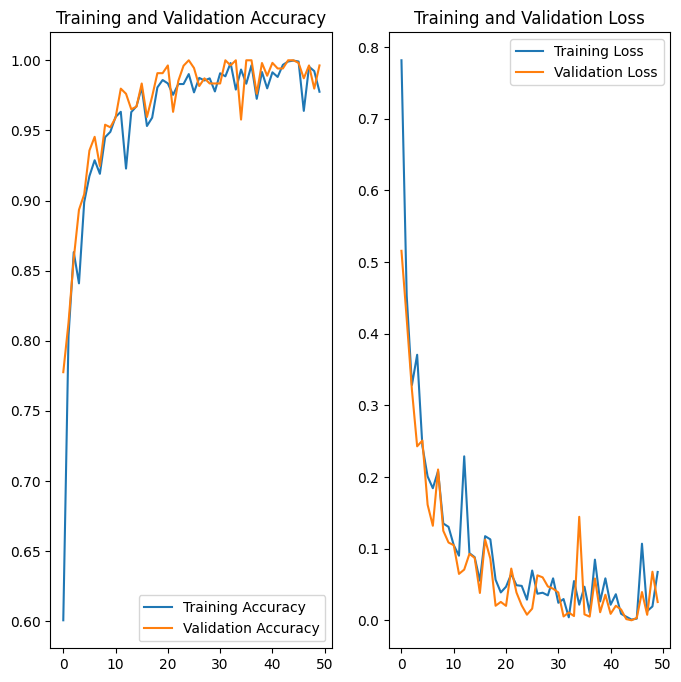

In [61]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: Tomato___healthy
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 674ms/step
predicted label: Tomato___healthy


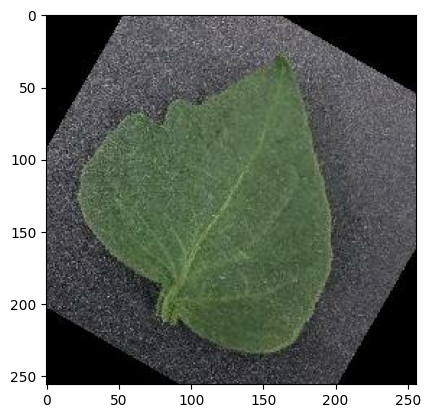

In [74]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:", class_names [first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:", class_names[np.argmax(batch_prediction[0])])

In [66]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


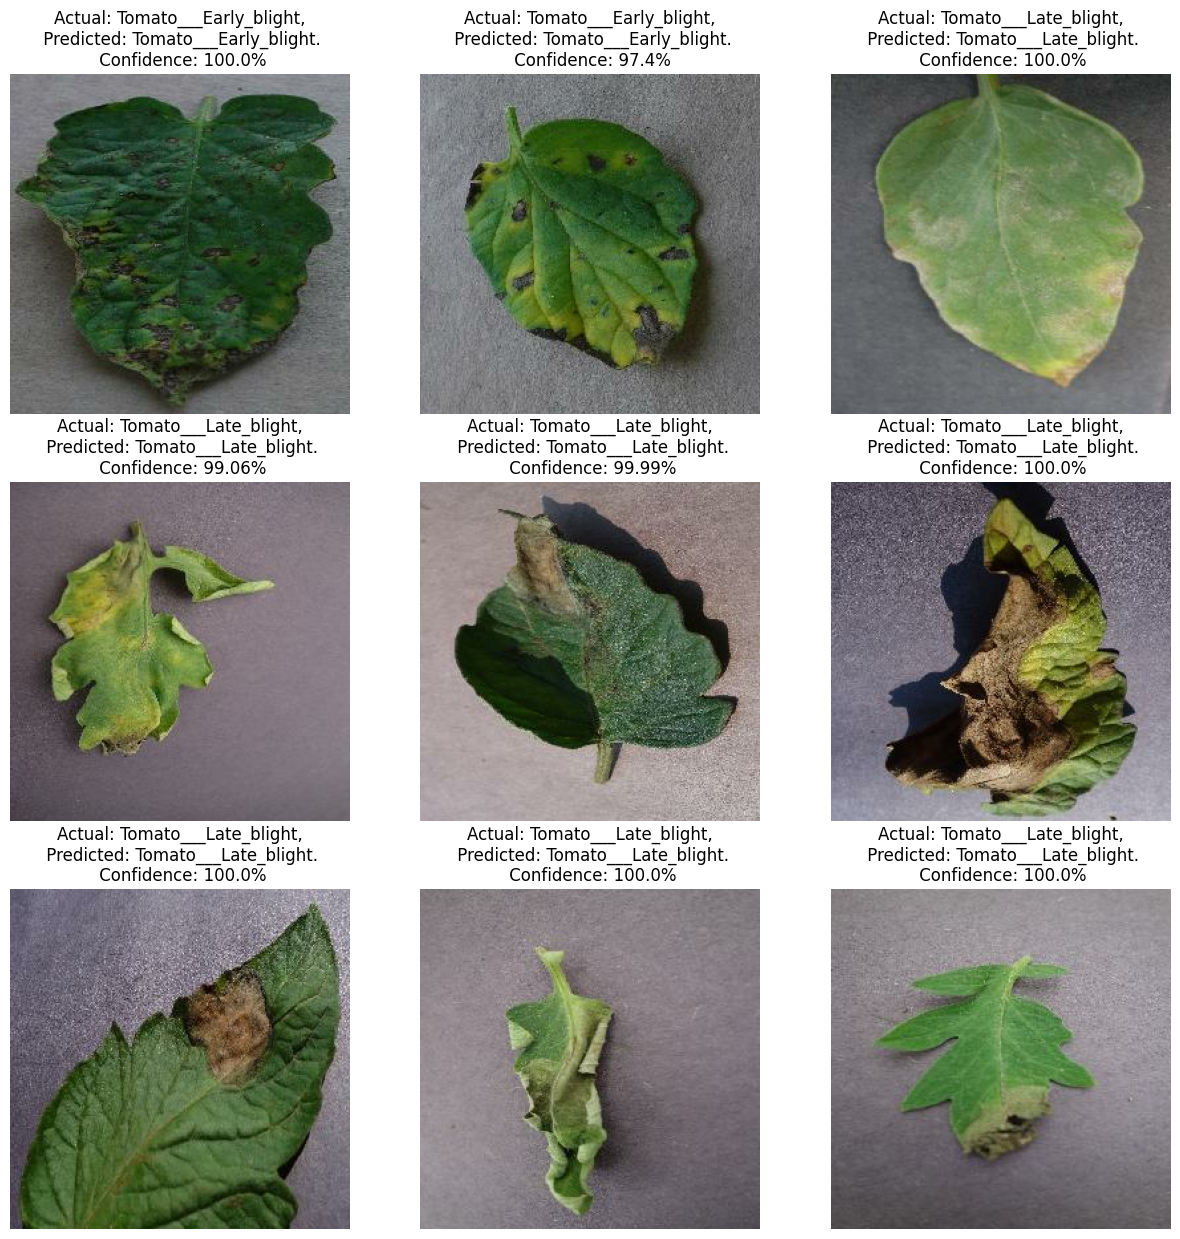

In [75]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [97]:
import os
[os.listdir("../models")]

[['1.h5']]

In [1]:
!pip install autoviz

Defaulting to user installation because normal site-packages is not writeable
  Using cached contourpy-1.2.1-cp311-cp311-win_amd64.whl.metadata (5.8 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ---------------------------------------- 0.0/165.9 kB ? eta -:--:--
     -------------- ------------------------ 61.4/165.9 kB 3.4 MB/s eta 0:00:01
     -------------------------------------- 165.9/165.9 kB 2.5 MB/s eta 0:00:00
  Using cached kiwisolver-1.4.5-cp311-cp311-win_amd64.whl.metadata (6.5 kB)
  Using cached Markdown-3.6-py3-none-any.whl.metadata (7.0 kB)
     ---------------------------------------- 0.0/57.6 kB ? eta -:--:--
     ---------------------------------------- 57.6/57.6 kB 3.0 MB/s eta 0:00:00
     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ---------------------------------------- 60.8/60.8 kB ? eta 0:00:00
     ---------------------------------------- 0.0/41.5 kB ? eta -:--:--
     -------------------------------------


[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
from autoviz. Autoviz_class import Autoviz_class

Av = Autoviz_class()

ModuleNotFoundError: No module named 'autoviz'

In [ ]:
filename = "titanic.csv"
sep = ","
dft = AV.AutoViz(
    filename,
    sep=",",
    depVar="",
    dfte=None,
    header=0,
    verbose=0,
    lowess=False,
    chart_format="svg",
    max_rows_analyzed=150000,
    max_cols_analyzed=30,
)

In [4]:
pip list



SyntaxError: invalid syntax (816758482.py, line 1)

In [5]:
!pip list


Package                   Version
------------------------- --------------
altair                    5.3.0
anyio                     4.4.0
argon2-cffi               23.1.0
argon2-cffi-bindings      21.2.0
arrow                     1.3.0
asttokens                 2.4.1
async-lru                 2.0.4
attrs                     23.2.0
autoviz                   0.1.905
Babel                     2.15.0
beautifulsoup4            4.12.3
bleach                    6.1.0
blinker                   1.7.0
bokeh                     3.4.3
CacheControl              0.14.0
cachetools                5.3.3
certifi                   2024.2.2
cffi                      1.16.0
charset-normalizer        3.3.2
click                     8.1.7
colorama                  0.4.6
colorcet                  3.1.0
comm                      0.2.2
contourpy                 1.2.1
cryptography              42.0.5
cycler                    0.12.1
debugpy                   1.8.2
decorator                 5.1.1
defusedxml     

In [8]:
from autoviz.Autoviz_class import Autoviz_class
Av = Autoviz_class()

ModuleNotFoundError: No module named 'autoviz'